In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("../../datasets/1976-2018-house2.csv", encoding="latin1")

In [5]:
# First 5 rows
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424


In [6]:
# Statistical metrics
data.describe()

,year,state_fips,state_cen,state_ic,district,candidatevotes,totalvotes,version
count,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.0
mean,1997.724322,28.732015,50.862397,37.025375,9.892462,64249.576798,206191.268559,20200424.0
std,12.512426,15.213433,26.326139,21.812798,9.991146,61442.185888,70158.576241,0.0
min,1976.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,20200424.0
25%,1988.000000,17.000000,23.000000,14.000000,3.000000,4277.500000,158643.000000,20200424.0
50%,1998.000000,31.000000,51.000000,36.000000,6.000000,55736.000000,201162.000000,20200424.0
75%,2008.000000,40.000000,74.000000,52.000000,13.000000,108338.750000,251238.000000,20200424.0
max,2018.000000,56.000000,95.000000,82.000000,53.000000,329800.000000,507831.000000,20200424.0


In [7]:
# What are the columns?
data.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'runoff', 'special', 'candidate',
       'party', 'writein', 'mode', 'candidatevotes', 'totalvotes',
       'unofficial', 'version'],
      dtype='object')

# Understanding the Data: Columns

year: year in which election was held

state: state name

description: state abbreviation

state_fips: numeric state code

state_cen: US census state code

state_ic: ICPSR state code

office: U.S. House (constant)

district: District number. At-large districts are coded as 0

stage: electoral stage ("gen" = general, "pri" = primary)

special: special election boolean (True = special election, False = regular election

candidate: name of candidate

party: party of candidate 

writein: boolean write in candidate (true = write-in, false = not write-in)

mode: mode of voting

candidatevotes: # of votes received by this candidate for this party

totalvates: total number of votes cast for this election

unofficial: boolean True/False (true = unofficial result)

version: date when this dataset was finalized

In [8]:
# Plot some distributions for 2018
data2018 = data[data["year"] == 2018]
data2018.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
28251,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Robert Kennedy Jr.,democrat,False,total,89226,242617,False,20200424
28252,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Bradley Byrne,republican,False,total,153228,242617,False,20200424
28253,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,NaN,NaN,True,total,163,242617,False,20200424
28254,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Martha Roby,republican,False,total,138879,226230,False,20200424
28255,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Tabitha Isner,democrat,False,total,86931,226230,False,20200424


In [24]:
data2018[data2018["party"] == "democrat"]

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
28251,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Robert Kennedy Jr.,democrat,False,total,89226,242617,False,20200424
28255,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Tabitha Isner,democrat,False,total,86931,226230,False,20200424
28258,2018,Alabama,AL,1,63,41,US House,3,gen,NaN,False,Mallory Hagan,democrat,False,total,83996,231915,False,20200424
28261,2018,Alabama,AL,1,63,41,US House,4,gen,NaN,False,Lee Auman,democrat,False,total,46492,230969,False,20200424
28264,2018,Alabama,AL,1,63,41,US House,5,gen,NaN,False,Peter Joffrion,democrat,False,total,101388,260673,False,20200424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29614,2018,Maryland,MD,24,52,52,US House,4,gen,NaN,False,Anthony G. Brown,democrat,False,total,209642,268583,False,20200424
29620,2018,Maryland,MD,24,52,52,US House,5,gen,NaN,False,Steny H. Hoyer,democrat,False,total,213796,304209,False,20200424
29624,2018,Maryland,MD,24,52,52,US House,6,gen,NaN,False,David Trone,democrat,False,total,163346,276974,False,20200424
29629,2018,Maryland,MD,24,52,52,US House,7,gen,NaN,False,Elijah Cummings,democrat,False,total,202345,264710,False,20200424


In [93]:
data2018Candidate = data2018[["party", "state", "candidatevotes"]]
data2018Candidate

,party,state,candidatevotes
28251,democrat,Alabama,89226
28252,republican,Alabama,153228
28253,NaN,Alabama,163
28254,republican,Alabama,138879
28255,democrat,Alabama,86931
...,...,...,...
29631,NaN,Maryland,272
29632,democrat,Maryland,217679
29633,libertarian,Maryland,4853
29634,republican,Maryland,96525


In [111]:
# Get two dataframes
# One for democrat votes, one for republican votes.
# Group them by state.
demOnly = np.array(data2018Candidate["party"] == "democrat")
repOnly = np.array(data2018Candidate["party"] == "republican")
demVotes = data2018Candidate[demOnly].groupby(["state"]).sum()
repVotes = data2018Candidate[repOnly].groupby(["state"]).sum()

In [126]:
# Rename columns to get ready to join our dataframes.
demVotes = demVotes.rename(columns={"candidatevotes": "demVotes"})
repVotes = repVotes.rename(columns={"candidatevotes": "repVotes"})

In [134]:
# Join, then select rows with NaNs 
# To see which states are missing votes from
# either party
votesDiff = demVotes.join(repVotes, how="outer")
votesDiff[votesDiff.isnull().any(axis=1)]

,demVotes,repVotes
state,,
Minnesota,NaN,1125533
North Dakota,NaN,193568


In [123]:
# Join on all states that have votes on both parties.
votesState = demVotes.join(repVotes, how="inner")
votesState

,demVotes,repVotes
state,,
Alabama,678687,975737
Alaska,131199,149779
Arizona,1179193,1139251
Arkansas,312978,556339
California,8010445,3973396
Colorado,1343211,1079772
Connecticut,808652,512495
Delaware,227353,125384
Florida,3307232,3675417


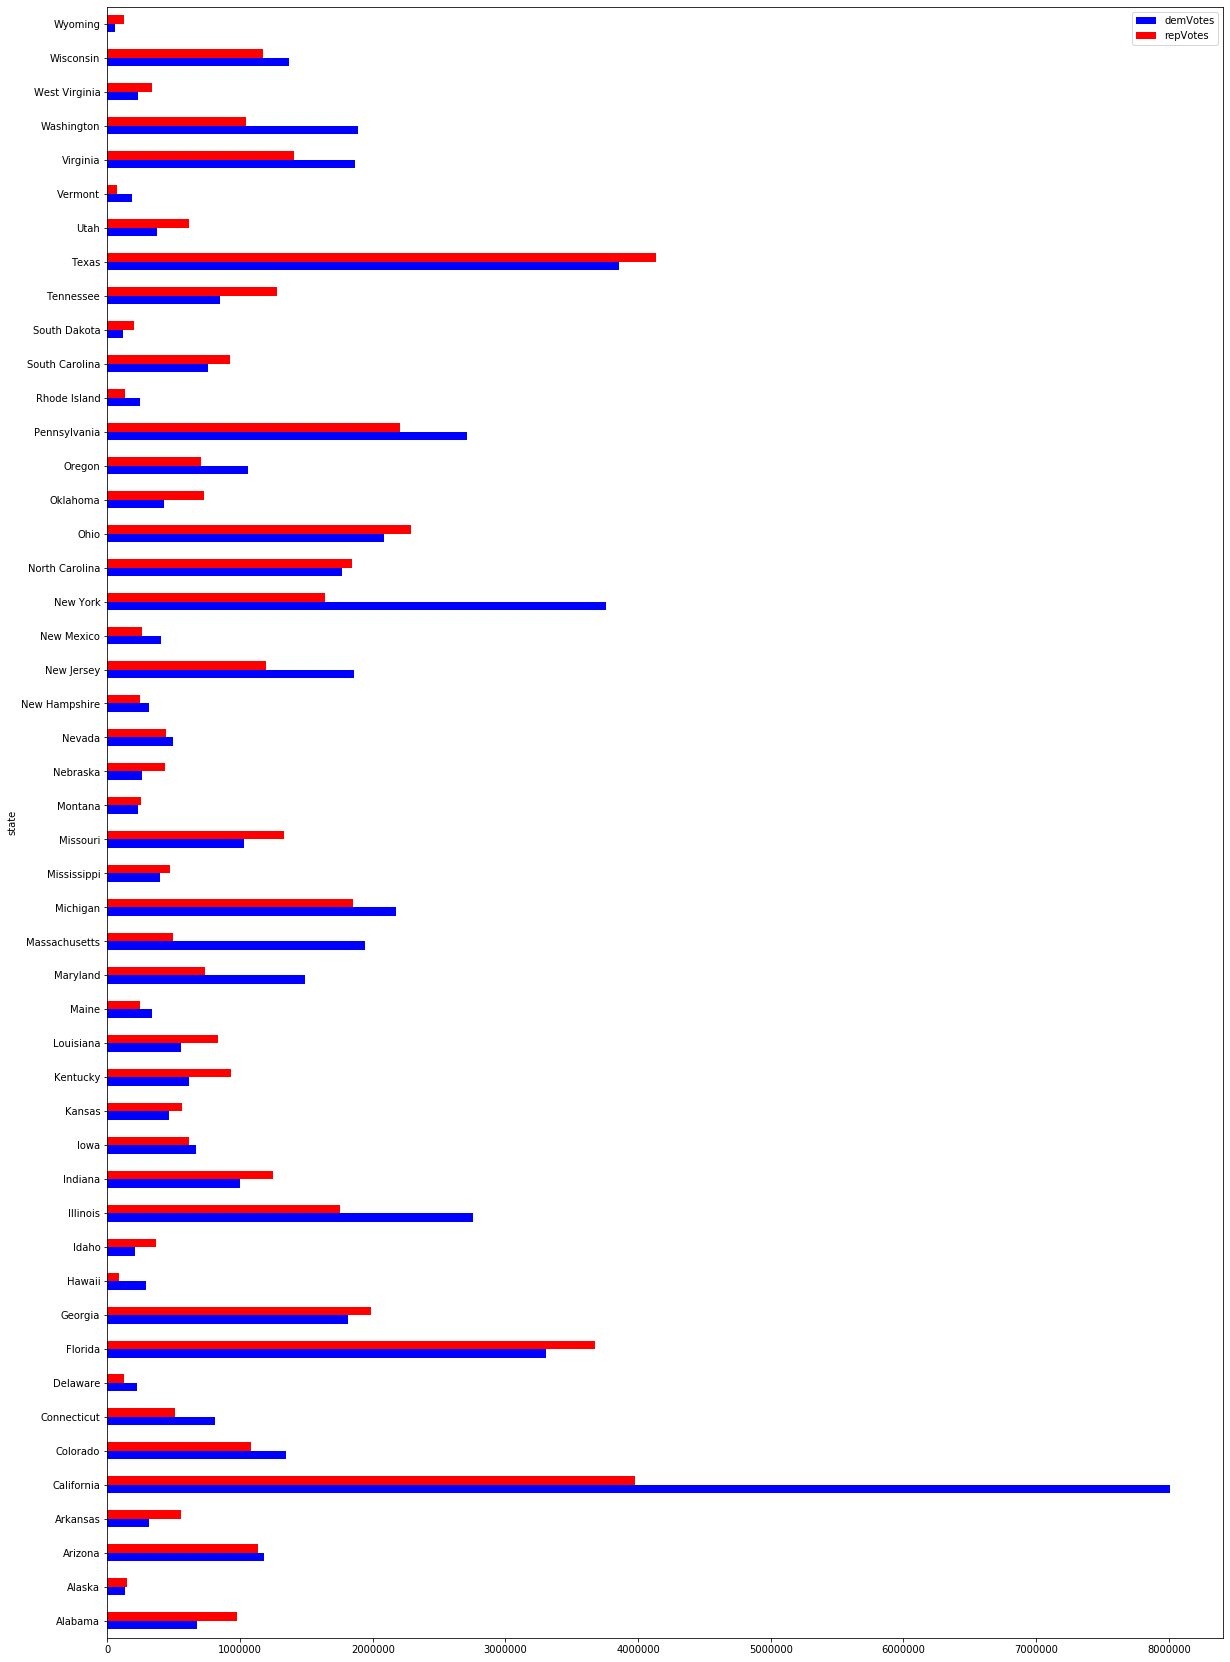

In [143]:
# Now plot a stacked bar chart.
votesState.plot.barh(figsize=(20, 30), color=["blue", "red"])

In [144]:
votesState.describe()

,demVotes,repVotes
count,4.800000e+01,4.800000e+01
mean,1.227487e+06,1.029863e+06
std,1.402223e+06,9.629009e+05
min,5.990300e+04,7.070500e+04
25%,3.125440e+05,3.602812e+05
50%,7.185135e+05,7.342185e+05
75%,1.825056e+06,1.292485e+06
max,8.010445e+06,4.135359e+06
